In [1]:
import torchvision
import torch.nn as nn
from torchvision.utils import save_image, make_grid
import json
# from src.model import Net
import os
import torch
import matplotlib.pyplot as plt
import numpy as np

/home/xiaochen/anaconda3/envs/IFv2/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
os.chdir("/home/xiaochen/kewen/IF_project")

In [3]:

trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True)

testset = torchvision.datasets.MNIST(root='./data', train=False,
                                        download=True)
                                

In [4]:
def _subsample_by_classes(all_examples, labels, num_per_class=None):
    if num_per_class is None:
        return all_examples

    examples = {label: [] for label in labels}
    for example in all_examples:
        if example[1] in labels:
            examples[example[1]].append(example)

    picked_examples = []
    for label in labels:
        examples_with_label = examples[label][:num_per_class[label]]
        picked_examples.extend(examples_with_label)

        print(f'number of examples with label \'{label}\': '
            f'{len(examples_with_label)}')

    return picked_examples

In [5]:
trainset_sampled = _subsample_by_classes(trainset, [1,7], [10000]*10)

number of examples with label '1': 6742
number of examples with label '7': 6265


In [37]:
# JSON file
target_path = 'outputs/mnist_good/Identity_mnist_devId_1_classOneAndNineAll_CE_CnnMnist.json'
with open (target_path, "r") as f:
     data_target = json.loads(f.read())


In [10]:
data_target

{'helpful': [2722,
  4677,
  4387,
  5737,
  653,
  5746,
  31,
  5381,
  4698,
  4409,
  998,
  4191,
  3485,
  5386,
  3012,
  268,
  582,
  3618,
  6162,
  21,
  6530,
  2463,
  5690,
  5179,
  5836,
  6367,
  392,
  4225,
  4784,
  3952,
  1821,
  5172,
  1326,
  703,
  2624,
  5621,
  4302,
  3351,
  6684,
  4771,
  1782,
  6719,
  1608,
  344,
  2734,
  792,
  500,
  6014,
  461,
  2851,
  2778,
  3319,
  1654,
  828,
  5625,
  159,
  452,
  5613,
  853,
  2240,
  6457,
  1305,
  2717,
  4882,
  1772,
  3581,
  5237,
  4488,
  384,
  4728,
  1221,
  1049,
  4762,
  2654,
  448,
  3251,
  1362,
  6297,
  4041,
  5570,
  3356,
  6242,
  1574,
  5963,
  1132,
  120,
  3824,
  5197,
  3320,
  6673,
  127,
  2885,
  6463,
  234,
  5039,
  2005,
  5899,
  2014,
  2444,
  1195,
  1283,
  1107,
  604,
  3582,
  934,
  4879,
  1395,
  6681,
  4672,
  1786,
  137,
  2358,
  245,
  4780,
  5568,
  179,
  1856,
  1372,
  5992,
  4533,
  5622,
  636,
  69,
  5068,
  4152,
  1945,
  5564,
  71

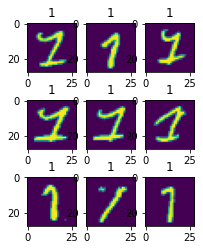

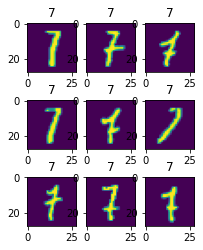

In [11]:
fig = plt.figure(figsize=(3, 4))
for i in range(1,10):
    fig.add_subplot(3,3,i)
    plt.imshow(trainset_sampled[data_target['helpful'][i]][0])
    plt.title(trainset_sampled[data_target['helpful'][i]][1])
fig = plt.figure(figsize=(3, 4))
for i in range(1,10):
    fig.add_subplot(3,3,i)
    plt.imshow(trainset_sampled[data_target['harmful'][i]][0])
    plt.title(trainset_sampled[data_target['harmful'][i]][1])

In [35]:
# JSON file
groundTruthPath = 'outputs/mnist_good/Percy_mnist_devId_1_classOneAndNineAll_CE_CnnMnist.json'
with open (groundTruthPath, "r") as f:
     data_groundtruth = json.loads(f.read())


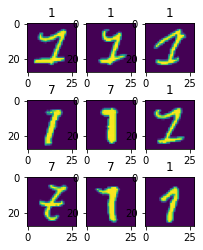

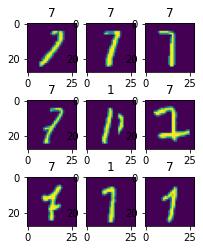

In [36]:
fig = plt.figure(figsize=(3, 4))
for i in range(1,10):
    fig.add_subplot(3,3,i)
    plt.imshow(trainset_sampled[data_groundtruth['helpful'][i]][0])
    plt.title(trainset_sampled[data_groundtruth['helpful'][i]][1])
fig = plt.figure(figsize=(3, 4))
for i in range(1,10):
    fig.add_subplot(3,3,i)
    plt.imshow(trainset_sampled[data_groundtruth['harmful'][i]][0])
    plt.title(trainset_sampled[data_groundtruth['harmful'][i]][1])

In [18]:
y =  np.array(data_groundtruth['influence'])
x = np.array(data_target['influence'])*32
Correlation = round(np.corrcoef(x,y)[0,1],3)

Text(0.5, 1.0, 'correlation 0.296')

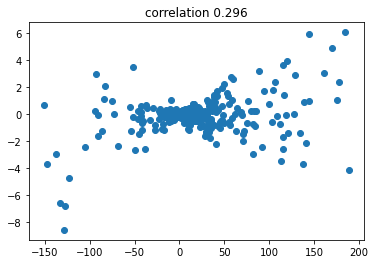

In [19]:
plt.scatter(x,y)
plt.title(f"correlation {Correlation}")

In [128]:
ind = np.argsort(data_groundtruth['influence'])

In [129]:
# JSON file
target_path = 'outputs/mnist/IF_mnist_devId_0_epoch_35.json'
with open (target_path, "r") as f:
     data_target = json.loads(f.read())

y =  np.array(data_groundtruth['influence'])[ind]
x = np.array(data_target['influence'])[ind]
Correlation = round(np.corrcoef(x,y)[0,1],3)

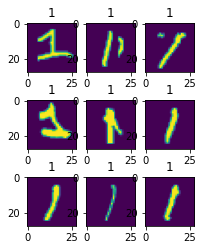

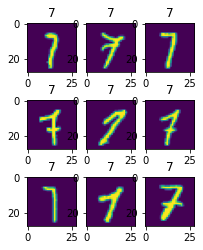

In [131]:
fig = plt.figure(figsize=(3, 4))
for i in range(1,10):
    fig.add_subplot(3,3,i)
    plt.imshow(trainset_sampled[data_target['helpful'][i]][0])
    plt.title(trainset_sampled[data_target['helpful'][i]][1])
fig = plt.figure(figsize=(3, 4))
for i in range(1,10):
    fig.add_subplot(3,3,i)
    plt.imshow(trainset_sampled[data_target['harmful'][i]][0])
    plt.title(trainset_sampled[data_target['harmful'][i]][1])

Text(0.5, 1.0, 'correlation -0.042')

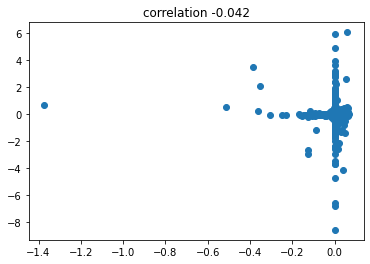

In [130]:
plt.clf()
plt.scatter(x,y)
plt.title(f"correlation {Correlation}")